In [2]:
import snscrape.modules.twitter as sntwitter
import pandas as pd

# 2022 Midterms

In [3]:
# Creating list to append tweet data to
attributes_container = []

# Using TwitterSearchScraper to scrape data and append tweets to list
for i,tweet in enumerate(sntwitter.TwitterSearchScraper('#midterms since:2022-09-06 until:2022-11-07').get_items()):
    if i>4000:
        break
    attributes_container.append([tweet.user.username, tweet.date, tweet.likeCount, tweet.sourceLabel, tweet.content])
    
# Creating a dataframe to load the list
tweets_df_2022 = pd.DataFrame(attributes_container, columns=["User", "Date Created", "Number of Likes", "Source of Tweet", "Tweet"])

C:\Users\HNOURB~1\AppData\Local\Temp/ipykernel_27256/1111952447.py:8: FutureWarning: content is deprecated, use rawContent instead
  attributes_container.append([tweet.user.username, tweet.date, tweet.likeCount, tweet.sourceLabel, tweet.content])


In [4]:
tweets_df_2022

,User,Date Created,Number of Likes,Source of Tweet,Tweet
0,JohannesNormann,2022-11-06 23:59:13+00:00,2,Twitter Web App,👍👍👍#Midterms
1,taylmae,2022-11-06 23:58:24+00:00,4,Twitter for iPhone,Reminder that the judges on the Cook County ba...
2,PoliticsKulture,2022-11-06 23:57:11+00:00,0,ContentStudio.io,Youngkin Excuses Kari Lake's Election Lies: No...
3,PoliticsKulture,2022-11-06 23:57:10+00:00,0,ContentStudio.io,Actors Mandy Patinkin And Kathryn Grody: Get O...
4,ReneNow,2022-11-06 23:53:21+00:00,0,Twitter for iPhone,#CNN #Midterms #oregon
...,...,...,...,...,...
3996,__viznews__,2022-11-04 08:00:27+00:00,0,viznews,#Biden #Deniers #Nolte #Midterms #Election #Re...
3997,OzymandiusUK,2022-11-04 08:00:23+00:00,1,Twitter for iPad,Things happening in America impact the world.\...
3998,PoliticsKulture,2022-11-04 07:59:12+00:00,0,ContentStudio.io,Election Workers Become Heroes And Villains In...
3999,negocios_tv,2022-11-04 07:55:37+00:00,4,Twitter Web App,#Biden inyecta más #tensión: los #resultados d...


# Topic Modeling - 2022 Midterms

In [5]:
import pandas as pd
#import preprocessor as p
import matplotlib
import nltk
import re
import math

from nltk import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer, WordNetLemmatizer
from nltk.tokenize import RegexpTokenizer

from matplotlib import pyplot as plt
from matplotlib import gridspec
from sklearn.feature_extraction.text import CountVectorizer
from gensim.corpora import Dictionary
from gensim.models.ldamodel import LdaModel
from gensim.models import CoherenceModel
from datetime import datetime

In [7]:
tweets_df_2022

,User,Date Created,Number of Likes,Source of Tweet,Tweet
0,JohannesNormann,2022-11-06 23:59:13+00:00,2,Twitter Web App,👍👍👍#Midterms
1,taylmae,2022-11-06 23:58:24+00:00,4,Twitter for iPhone,Reminder that the judges on the Cook County ba...
2,PoliticsKulture,2022-11-06 23:57:11+00:00,0,ContentStudio.io,Youngkin Excuses Kari Lake's Election Lies: No...
3,PoliticsKulture,2022-11-06 23:57:10+00:00,0,ContentStudio.io,Actors Mandy Patinkin And Kathryn Grody: Get O...
4,ReneNow,2022-11-06 23:53:21+00:00,0,Twitter for iPhone,#CNN #Midterms #oregon
...,...,...,...,...,...
3996,__viznews__,2022-11-04 08:00:27+00:00,0,viznews,#Biden #Deniers #Nolte #Midterms #Election #Re...
3997,OzymandiusUK,2022-11-04 08:00:23+00:00,1,Twitter for iPad,Things happening in America impact the world.\...
3998,PoliticsKulture,2022-11-04 07:59:12+00:00,0,ContentStudio.io,Election Workers Become Heroes And Villains In...
3999,negocios_tv,2022-11-04 07:55:37+00:00,4,Twitter Web App,#Biden inyecta más #tensión: los #resultados d...


In [8]:
tweets_2022 = tweets_df_2022[['Tweet']]

In [9]:
tweets_2022

,Tweet
0,👍👍👍#Midterms
1,Reminder that the judges on the Cook County ba...
2,Youngkin Excuses Kari Lake's Election Lies: No...
3,Actors Mandy Patinkin And Kathryn Grody: Get O...
4,#CNN #Midterms #oregon
...,...
3996,#Biden #Deniers #Nolte #Midterms #Election #Re...
3997,Things happening in America impact the world.\...
3998,Election Workers Become Heroes And Villains In...
3999,#Biden inyecta más #tensión: los #resultados d...


In [10]:
tweets_2022['Tweet']

0                                            👍👍👍#Midterms
1       Reminder that the judges on the Cook County ba...
2       Youngkin Excuses Kari Lake's Election Lies: No...
3       Actors Mandy Patinkin And Kathryn Grody: Get O...
4                                  #CNN #Midterms #oregon
                              ...                        
3996    #Biden #Deniers #Nolte #Midterms #Election #Re...
3997    Things happening in America impact the world.\...
3998    Election Workers Become Heroes And Villains In...
3999    #Biden inyecta más #tensión: los #resultados d...
4000    Election Turnout In Georgia 'Extraordinary' So...
Name: Tweet, Length: 4001, dtype: object

In [11]:
import preprocessor as p

In [12]:
#import re
def clean_tweets(text):
  text = re.sub("RT @[\w]*:","",text)
  text = re.sub("@[\w]*","",text)
  text = re.sub("https?://[A-Za-z0-9./]*","",text)
  text = re.sub("\n","",text)
  return text

In [13]:
tweets_2022['Tweet'] = tweets_2022['Tweet'].apply(lambda x: clean_tweets(x))

C:\Users\HNOURB~1\AppData\Local\Temp/ipykernel_27256/1174156698.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tweets_2022['Tweet'] = tweets_2022['Tweet'].apply(lambda x: clean_tweets(x))


In [14]:
tweets_2022

,Tweet
0,👍👍👍#Midterms
1,Reminder that the judges on the Cook County ba...
2,Youngkin Excuses Kari Lake's Election Lies: No...
3,Actors Mandy Patinkin And Kathryn Grody: Get O...
4,#CNN #Midterms #oregon
...,...
3996,#Biden #Deniers #Nolte #Midterms #Election #Re...
3997,Things happening in America impact the world.B...
3998,Election Workers Become Heroes And Villains In...
3999,#Biden inyecta más #tensión: los #resultados d...


In [16]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\hnourbakhsh\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [17]:
stop = stopwords.words('english')
tweets_2022['Clean_Tweet'] = tweets_2022['Tweet'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))

C:\Users\HNOURB~1\AppData\Local\Temp/ipykernel_27256/3939016316.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tweets_2022['Clean_Tweet'] = tweets_2022['Tweet'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))


In [18]:
tweets_2022

,Tweet,Clean_Tweet
0,👍👍👍#Midterms,👍👍👍#Midterms
1,Reminder that the judges on the Cook County ba...,Reminder judges Cook County ballot week make u...
2,Youngkin Excuses Kari Lake's Election Lies: No...,Youngkin Excuses Kari Lake's Election Lies: No...
3,Actors Mandy Patinkin And Kathryn Grody: Get O...,Actors Mandy Patinkin And Kathryn Grody: Get O...
4,#CNN #Midterms #oregon,#CNN #Midterms #oregon
...,...,...
3996,#Biden #Deniers #Nolte #Midterms #Election #Re...,#Biden #Deniers #Nolte #Midterms #Election #Re...
3997,Things happening in America impact the world.B...,Things happening America impact world.But firs...
3998,Election Workers Become Heroes And Villains In...,Election Workers Become Heroes And Villains In...
3999,#Biden inyecta más #tensión: los #resultados d...,#Biden inyecta más #tensión: los #resultados d...


In [19]:
for i in range(len(tweets_2022)):
    tweets_2022['Clean_Tweet'][i] = tweets_2022['Clean_Tweet'][i].lower()

C:\Users\HNOURB~1\AppData\Local\Temp/ipykernel_27256/1008317657.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tweets_2022['Clean_Tweet'][i] = tweets_2022['Clean_Tweet'][i].lower()


In [20]:
tweets_2022

,Tweet,Clean_Tweet
0,👍👍👍#Midterms,👍👍👍#midterms
1,Reminder that the judges on the Cook County ba...,reminder judges cook county ballot week make u...
2,Youngkin Excuses Kari Lake's Election Lies: No...,youngkin excuses kari lake's election lies: no...
3,Actors Mandy Patinkin And Kathryn Grody: Get O...,actors mandy patinkin and kathryn grody: get o...
4,#CNN #Midterms #oregon,#cnn #midterms #oregon
...,...,...
3996,#Biden #Deniers #Nolte #Midterms #Election #Re...,#biden #deniers #nolte #midterms #election #re...
3997,Things happening in America impact the world.B...,things happening america impact world.but firs...
3998,Election Workers Become Heroes And Villains In...,election workers become heroes and villains in...
3999,#Biden inyecta más #tensión: los #resultados d...,#biden inyecta más #tensión: los #resultados d...


In [21]:
import string

In [22]:
def remove_punct(txt):
    text_nopunct= "".join([char for char in txt if char not in string.punctuation])
    return text_nopunct
tweets_2022['Finished_Tweet']= tweets_2022['Clean_Tweet'].apply(lambda x: remove_punct(x))

C:\Users\HNOURB~1\AppData\Local\Temp/ipykernel_27256/3240973943.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tweets_2022['Finished_Tweet']= tweets_2022['Clean_Tweet'].apply(lambda x: remove_punct(x))


In [23]:
tweets_2022

,Tweet,Clean_Tweet,Finished_Tweet
0,👍👍👍#Midterms,👍👍👍#midterms,👍👍👍midterms
1,Reminder that the judges on the Cook County ba...,reminder judges cook county ballot week make u...,reminder judges cook county ballot week make u...
2,Youngkin Excuses Kari Lake's Election Lies: No...,youngkin excuses kari lake's election lies: no...,youngkin excuses kari lakes election lies not ...
3,Actors Mandy Patinkin And Kathryn Grody: Get O...,actors mandy patinkin and kathryn grody: get o...,actors mandy patinkin and kathryn grody get ou...
4,#CNN #Midterms #oregon,#cnn #midterms #oregon,cnn midterms oregon
...,...,...,...
3996,#Biden #Deniers #Nolte #Midterms #Election #Re...,#biden #deniers #nolte #midterms #election #re...,biden deniers nolte midterms election republic...
3997,Things happening in America impact the world.B...,things happening america impact world.but firs...,things happening america impact worldbut first...
3998,Election Workers Become Heroes And Villains In...,election workers become heroes and villains in...,election workers become heroes and villains in...
3999,#Biden inyecta más #tensión: los #resultados d...,#biden inyecta más #tensión: los #resultados d...,biden inyecta más tensión los resultados de la...


In [24]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\hnourbakhsh\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [25]:
tweets_2022['tokenized_tweet'] = 0
for i in range(len(tweets_2022)):
    tweets_2022['tokenized_tweet'][i] = word_tokenize(tweets_2022['Finished_Tweet'][i])

C:\Users\HNOURB~1\AppData\Local\Temp/ipykernel_27256/1567917459.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tweets_2022['tokenized_tweet'] = 0
C:\Users\HNOURB~1\AppData\Local\Temp/ipykernel_27256/1567917459.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tweets_2022['tokenized_tweet'][i] = word_tokenize(tweets_2022['Finished_Tweet'][i])
C:\Users\hnourbakhsh\Anaconda3\lib\site-packages\pandas\core\indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://p

In [26]:
tweets_2022

,Tweet,Clean_Tweet,Finished_Tweet,tokenized_tweet
0,👍👍👍#Midterms,👍👍👍#midterms,👍👍👍midterms,[👍👍👍midterms]
1,Reminder that the judges on the Cook County ba...,reminder judges cook county ballot week make u...,reminder judges cook county ballot week make u...,"[reminder, judges, cook, county, ballot, week,..."
2,Youngkin Excuses Kari Lake's Election Lies: No...,youngkin excuses kari lake's election lies: no...,youngkin excuses kari lakes election lies not ...,"[youngkin, excuses, kari, lakes, election, lie..."
3,Actors Mandy Patinkin And Kathryn Grody: Get O...,actors mandy patinkin and kathryn grody: get o...,actors mandy patinkin and kathryn grody get ou...,"[actors, mandy, patinkin, and, kathryn, grody,..."
4,#CNN #Midterms #oregon,#cnn #midterms #oregon,cnn midterms oregon,"[cnn, midterms, oregon]"
...,...,...,...,...
3996,#Biden #Deniers #Nolte #Midterms #Election #Re...,#biden #deniers #nolte #midterms #election #re...,biden deniers nolte midterms election republic...,"[biden, deniers, nolte, midterms, election, re..."
3997,Things happening in America impact the world.B...,things happening america impact world.but firs...,things happening america impact worldbut first...,"[things, happening, america, impact, worldbut,..."
3998,Election Workers Become Heroes And Villains In...,election workers become heroes and villains in...,election workers become heroes and villains in...,"[election, workers, become, heroes, and, villa..."
3999,#Biden inyecta más #tensión: los #resultados d...,#biden inyecta más #tensión: los #resultados d...,biden inyecta más tensión los resultados de la...,"[biden, inyecta, más, tensión, los, resultados..."


In [27]:
indices_to_drop = []
for i in range(len(tweets_2022)):
    if len(tweets_2022.tokenized_tweet[i]) == 0:
        indices_to_drop.append(tweets_2022.index[i])

tweets_2022 = tweets_2022.drop(indices_to_drop)
tweets_2022 = tweets_2022.reset_index(drop = True)
tweets_2022.head()

,Tweet,Clean_Tweet,Finished_Tweet,tokenized_tweet
0,👍👍👍#Midterms,👍👍👍#midterms,👍👍👍midterms,[👍👍👍midterms]
1,Reminder that the judges on the Cook County ba...,reminder judges cook county ballot week make u...,reminder judges cook county ballot week make u...,"[reminder, judges, cook, county, ballot, week,..."
2,Youngkin Excuses Kari Lake's Election Lies: No...,youngkin excuses kari lake's election lies: no...,youngkin excuses kari lakes election lies not ...,"[youngkin, excuses, kari, lakes, election, lie..."
3,Actors Mandy Patinkin And Kathryn Grody: Get O...,actors mandy patinkin and kathryn grody: get o...,actors mandy patinkin and kathryn grody get ou...,"[actors, mandy, patinkin, and, kathryn, grody,..."
4,#CNN #Midterms #oregon,#cnn #midterms #oregon,cnn midterms oregon,"[cnn, midterms, oregon]"


In [28]:
tweets_2022

,Tweet,Clean_Tweet,Finished_Tweet,tokenized_tweet
0,👍👍👍#Midterms,👍👍👍#midterms,👍👍👍midterms,[👍👍👍midterms]
1,Reminder that the judges on the Cook County ba...,reminder judges cook county ballot week make u...,reminder judges cook county ballot week make u...,"[reminder, judges, cook, county, ballot, week,..."
2,Youngkin Excuses Kari Lake's Election Lies: No...,youngkin excuses kari lake's election lies: no...,youngkin excuses kari lakes election lies not ...,"[youngkin, excuses, kari, lakes, election, lie..."
3,Actors Mandy Patinkin And Kathryn Grody: Get O...,actors mandy patinkin and kathryn grody: get o...,actors mandy patinkin and kathryn grody get ou...,"[actors, mandy, patinkin, and, kathryn, grody,..."
4,#CNN #Midterms #oregon,#cnn #midterms #oregon,cnn midterms oregon,"[cnn, midterms, oregon]"
...,...,...,...,...
3996,#Biden #Deniers #Nolte #Midterms #Election #Re...,#biden #deniers #nolte #midterms #election #re...,biden deniers nolte midterms election republic...,"[biden, deniers, nolte, midterms, election, re..."
3997,Things happening in America impact the world.B...,things happening america impact world.but firs...,things happening america impact worldbut first...,"[things, happening, america, impact, worldbut,..."
3998,Election Workers Become Heroes And Villains In...,election workers become heroes and villains in...,election workers become heroes and villains in...,"[election, workers, become, heroes, and, villa..."
3999,#Biden inyecta más #tensión: los #resultados d...,#biden inyecta más #tensión: los #resultados d...,biden inyecta más tensión los resultados de la...,"[biden, inyecta, más, tensión, los, resultados..."


In [29]:
def get_most_freq_words(str, n=None):
    vect = CountVectorizer().fit(str)
    bag_of_words = vect.transform(str)
    sum_words = bag_of_words.sum(axis=0) 
    freq = [(word, sum_words[0, idx]) for word, idx in vect.vocabulary_.items()]
    freq =sorted(freq, key = lambda x: x[1], reverse=True)
    return freq[:n]
  
get_most_freq_words([word for tweets_2022 in tweets_2022.tokenized_tweet for word in tweets_2022],100)

[('midterms', 3862),
 ('vote', 901),
 ('elections', 496),
 ('democracy', 478),
 ('de', 475),
 ('the', 442),
 ('election', 402),
 ('politics', 399),
 ('trump', 395),
 ('midterms2022', 393),
 ('biden', 363),
 ('democrats', 356),
 ('us', 320),
 ('elections2022', 312),
 ('amp', 290),
 ('2022elections', 260),
 ('equality', 253),
 ('democracynotautocracy', 252),
 ('politicstoday', 252),
 ('politicslive', 249),
 ('usa', 247),
 ('les', 244),
 ('midtermelections2022', 230),
 ('gop', 224),
 ('la', 208),
 ('republicans', 207),
 ('it', 199),
 ('voting', 195),
 ('republican', 181),
 ('get', 174),
 ('like', 172),
 ('en', 172),
 ('this', 168),
 ('election2022', 167),
 ('die', 165),
 ('senate', 157),
 ('electionday', 152),
 ('you', 151),
 ('midterm', 151),
 ('america', 151),
 ('midtermelections', 149),
 ('days', 141),
 ('twitter', 139),
 ('we', 133),
 ('nov', 130),
 ('people', 128),
 ('et', 126),
 ('voters', 125),
 ('le', 124),
 ('house', 121),
 ('candidate', 120),
 ('in', 117),
 ('2022', 117),
 ('new

In [30]:
words_list = get_most_freq_words([word for tweet_2022 in tweets_2022.tokenized_tweet for word in tweet_2022],100)
words_list

[('midterms', 3862),
 ('vote', 901),
 ('elections', 496),
 ('democracy', 478),
 ('de', 475),
 ('the', 442),
 ('election', 402),
 ('politics', 399),
 ('trump', 395),
 ('midterms2022', 393),
 ('biden', 363),
 ('democrats', 356),
 ('us', 320),
 ('elections2022', 312),
 ('amp', 290),
 ('2022elections', 260),
 ('equality', 253),
 ('democracynotautocracy', 252),
 ('politicstoday', 252),
 ('politicslive', 249),
 ('usa', 247),
 ('les', 244),
 ('midtermelections2022', 230),
 ('gop', 224),
 ('la', 208),
 ('republicans', 207),
 ('it', 199),
 ('voting', 195),
 ('republican', 181),
 ('get', 174),
 ('like', 172),
 ('en', 172),
 ('this', 168),
 ('election2022', 167),
 ('die', 165),
 ('senate', 157),
 ('electionday', 152),
 ('you', 151),
 ('midterm', 151),
 ('america', 151),
 ('midtermelections', 149),
 ('days', 141),
 ('twitter', 139),
 ('we', 133),
 ('nov', 130),
 ('people', 128),
 ('et', 126),
 ('voters', 125),
 ('le', 124),
 ('house', 121),
 ('candidate', 120),
 ('in', 117),
 ('2022', 117),
 ('new

In [31]:
strings_list = []
for i in words_list:
    for j in i:
        if type(j) == str:
            strings_list.append(j)

In [32]:
strings_list

['midterms',
 'vote',
 'elections',
 'democracy',
 'de',
 'the',
 'election',
 'politics',
 'trump',
 'midterms2022',
 'biden',
 'democrats',
 'us',
 'elections2022',
 'amp',
 '2022elections',
 'equality',
 'democracynotautocracy',
 'politicstoday',
 'politicslive',
 'usa',
 'les',
 'midtermelections2022',
 'gop',
 'la',
 'republicans',
 'it',
 'voting',
 'republican',
 'get',
 'like',
 'en',
 'this',
 'election2022',
 'die',
 'senate',
 'electionday',
 'you',
 'midterm',
 'america',
 'midtermelections',
 'days',
 'twitter',
 'we',
 'nov',
 'people',
 'et',
 'voters',
 'le',
 'house',
 'candidate',
 'in',
 '2022',
 'new',
 'tuesday',
 'des',
 'maga',
 'if',
 'one',
 'den',
 'what',
 'democrat',
 'know',
 'going',
 'ballot',
 'obama',
 'make',
 'spent',
 'media',
 'news',
 'time',
 'right',
 'starting',
 'votebluefordemocracy',
 'que',
 'and',
 'political',
 'dems',
 'via',
 'filing',
 'pennsylvania',
 'party',
 'is',
 'day',
 'see',
 'candidates',
 'go',
 'ahead',
 'women',
 'win',
 'l

In [33]:
strings_list

['midterms',
 'vote',
 'elections',
 'democracy',
 'de',
 'the',
 'election',
 'politics',
 'trump',
 'midterms2022',
 'biden',
 'democrats',
 'us',
 'elections2022',
 'amp',
 '2022elections',
 'equality',
 'democracynotautocracy',
 'politicstoday',
 'politicslive',
 'usa',
 'les',
 'midtermelections2022',
 'gop',
 'la',
 'republicans',
 'it',
 'voting',
 'republican',
 'get',
 'like',
 'en',
 'this',
 'election2022',
 'die',
 'senate',
 'electionday',
 'you',
 'midterm',
 'america',
 'midtermelections',
 'days',
 'twitter',
 'we',
 'nov',
 'people',
 'et',
 'voters',
 'le',
 'house',
 'candidate',
 'in',
 '2022',
 'new',
 'tuesday',
 'des',
 'maga',
 'if',
 'one',
 'den',
 'what',
 'democrat',
 'know',
 'going',
 'ballot',
 'obama',
 'make',
 'spent',
 'media',
 'news',
 'time',
 'right',
 'starting',
 'votebluefordemocracy',
 'que',
 'and',
 'political',
 'dems',
 'via',
 'filing',
 'pennsylvania',
 'party',
 'is',
 'day',
 'see',
 'candidates',
 'go',
 'ahead',
 'women',
 'win',
 'l

In [34]:
words_list

[('midterms', 3862),
 ('vote', 901),
 ('elections', 496),
 ('democracy', 478),
 ('de', 475),
 ('the', 442),
 ('election', 402),
 ('politics', 399),
 ('trump', 395),
 ('midterms2022', 393),
 ('biden', 363),
 ('democrats', 356),
 ('us', 320),
 ('elections2022', 312),
 ('amp', 290),
 ('2022elections', 260),
 ('equality', 253),
 ('democracynotautocracy', 252),
 ('politicstoday', 252),
 ('politicslive', 249),
 ('usa', 247),
 ('les', 244),
 ('midtermelections2022', 230),
 ('gop', 224),
 ('la', 208),
 ('republicans', 207),
 ('it', 199),
 ('voting', 195),
 ('republican', 181),
 ('get', 174),
 ('like', 172),
 ('en', 172),
 ('this', 168),
 ('election2022', 167),
 ('die', 165),
 ('senate', 157),
 ('electionday', 152),
 ('you', 151),
 ('midterm', 151),
 ('america', 151),
 ('midtermelections', 149),
 ('days', 141),
 ('twitter', 139),
 ('we', 133),
 ('nov', 130),
 ('people', 128),
 ('et', 126),
 ('voters', 125),
 ('le', 124),
 ('house', 121),
 ('candidate', 120),
 ('in', 117),
 ('2022', 117),
 ('new

In [35]:
words = ['midterms', 'vote', 'elections', 'de', 'the', 'election', 'politics', 'midterms2022', 'elections2022', 
        'les', 'midtermelections2022', 'it', 'get', 'like', 'en', 'this', 'election2022', 'die', 'you', 'midterm', 'electionday', 
        'midtermelections', 'twitter', 'we', 'et', 'voters', 'le', 'in', '2022', 'if', 'one', 'what', 'make', 'spent', 
        'and', 'via', 'is', 'on', 'der', 'they', 'week']

In [36]:
for i in range(len(tweets_2022)):
    tweets_2022.tokenized_tweet[i] = [x for x in tweets_2022.tokenized_tweet[i] if x not in words]

tweets_2022.head()

,Tweet,Clean_Tweet,Finished_Tweet,tokenized_tweet
0,👍👍👍#Midterms,👍👍👍#midterms,👍👍👍midterms,[👍👍👍midterms]
1,Reminder that the judges on the Cook County ba...,reminder judges cook county ballot week make u...,reminder judges cook county ballot week make u...,"[reminder, judges, cook, county, ballot, upwar..."
2,Youngkin Excuses Kari Lake's Election Lies: No...,youngkin excuses kari lake's election lies: no...,youngkin excuses kari lakes election lies not ...,"[youngkin, excuses, kari, lakes, lies, not, ev..."
3,Actors Mandy Patinkin And Kathryn Grody: Get O...,actors mandy patinkin and kathryn grody: get o...,actors mandy patinkin and kathryn grody get ou...,"[actors, mandy, patinkin, kathryn, grody, out,..."
4,#CNN #Midterms #oregon,#cnn #midterms #oregon,cnn midterms oregon,"[cnn, oregon]"


In [37]:
tweets_2022_dictionary = Dictionary(tweets_2022.tokenized_tweet)

In [38]:
tweets_2022_corpus = [tweets_2022_dictionary.doc2bow(tweet) for tweet in tweets_2022.tokenized_tweet]

In [39]:
tweets_2022_corpus

[[(0, 1)],
 [(1, 1),
  (2, 1),
  (3, 1),
  (4, 1),
  (5, 1),
  (6, 1),
  (7, 1),
  (8, 1),
  (9, 1),
  (10, 1),
  (11, 1),
  (12, 1),
  (13, 1),
  (14, 1),
  (15, 1),
  (16, 1),
  (17, 1),
  (18, 1),
  (19, 1),
  (20, 1)],
 [(21, 1),
  (22, 1),
  (23, 1),
  (24, 1),
  (25, 1),
  (26, 1),
  (27, 1),
  (28, 1),
  (29, 1),
  (30, 1),
  (31, 1),
  (32, 1),
  (33, 1),
  (34, 1),
  (35, 1),
  (36, 1)],
 [(21, 1),
  (23, 1),
  (24, 1),
  (25, 1),
  (32, 1),
  (33, 1),
  (37, 1),
  (38, 1),
  (39, 1),
  (40, 1),
  (41, 1),
  (42, 1)],
 [(43, 1), (44, 1)],
 [(45, 1), (46, 1), (47, 1), (48, 1), (49, 1), (50, 1)],
 [(51, 1), (52, 1), (53, 1), (54, 1)],
 [(21, 1),
  (23, 1),
  (24, 1),
  (25, 1),
  (32, 1),
  (33, 1),
  (55, 1),
  (56, 1),
  (57, 1),
  (58, 1),
  (59, 1),
  (60, 1),
  (61, 1),
  (62, 1),
  (63, 1)],
 [(21, 1),
  (23, 1),
  (24, 1),
  (25, 1),
  (32, 1),
  (33, 1),
  (64, 1),
  (65, 1),
  (66, 1),
  (67, 1),
  (68, 1),
  (69, 1),
  (70, 1),
  (71, 1),
  (72, 1)],
 [(44, 1), (73, 1)

In [40]:
import gensim
from gensim.models import ldamulticore
from pprint import pprint
from gensim.models import coherencemodel

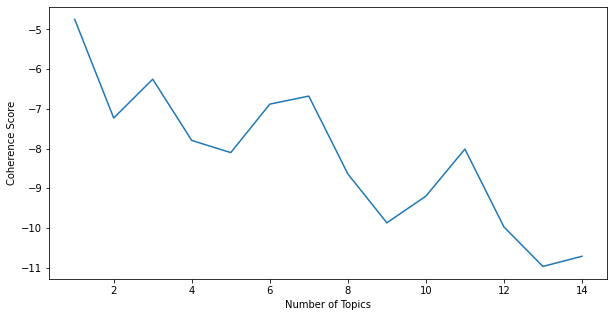

In [41]:
tweets_coherence = []
for nb_topics in range(1,15):
    lda = LdaModel(tweets_2022_corpus, num_topics = nb_topics, id2word = tweets_2022_dictionary, passes=10)
    cohm = CoherenceModel(model=lda, corpus=tweets_2022_corpus, dictionary=tweets_2022_dictionary, coherence='u_mass')
    coh = cohm.get_coherence()
    tweets_coherence.append(coh)

# visualize coherence
plt.figure(figsize=(10,5))
plt.plot(range(1,15),tweets_coherence)
plt.xlabel("Number of Topics")
plt.ylabel("Coherence Score");

In [42]:
k = 7
tweets_lda = LdaModel(tweets_2022_corpus, num_topics = k, id2word = tweets_2022_dictionary, passes=10)

def plot_top_words(lda=tweets_lda, nb_topics=k, nb_words=10):
    top_words = [[word for word,_ in lda.show_topic(topic_id, topn=50)] for topic_id in range(lda.num_topics)]
    top_betas = [[beta for _,beta in lda.show_topic(topic_id, topn=50)] for topic_id in range(lda.num_topics)]

    gs  = gridspec.GridSpec(round(math.sqrt(k))+1,round(math.sqrt(k))+1)
    gs.update(wspace=0.5, hspace=0.5)
    plt.figure(figsize=(20,15))
    for i in range(nb_topics):
        ax = plt.subplot(gs[i])
        plt.barh(range(nb_words), top_betas[i][:nb_words], align='center',color='blue', ecolor='black')
        ax.invert_yaxis()
        ax.set_yticks(range(nb_words))
        ax.set_yticklabels(top_words[i][:nb_words])
        plt.title("Topic "+str(i))

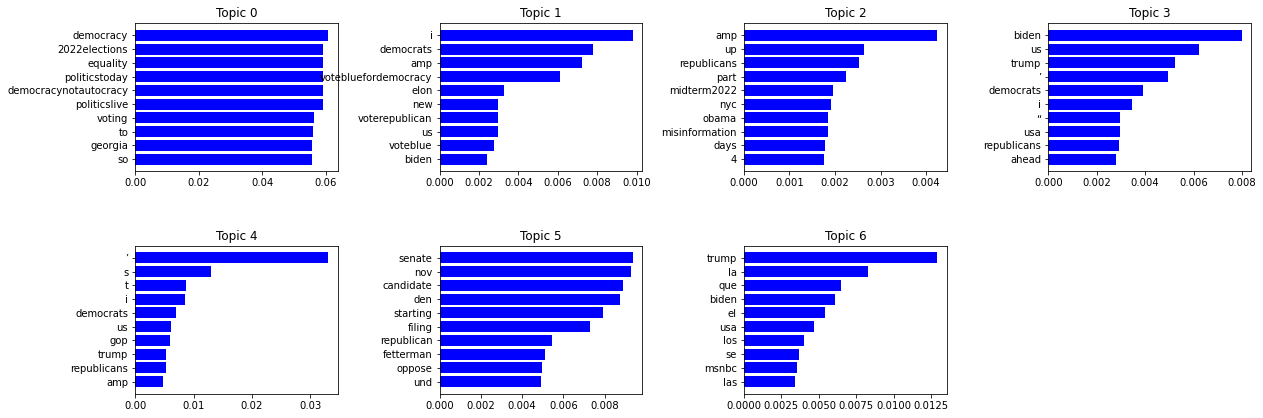

In [43]:
from matplotlib import gridspec
plot_top_words()